In [1]:
# Basic packages
import numpy as np
from matplotlib import pyplot as plt
import xarray as xr
import pandas as pd
import math
import netCDF4 as nc

# DateTime packages
from matplotlib.dates import DateFormatter
from datetime import datetime, timedelta
import time
import matplotlib.dates as mdates

# Stats packages
import scipy
import bottleneck as bn
import PyCO2SYS as pyco2
import gsw
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import seaborn as sns

# Logistical packages
import requests
from importlib import reload
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.offsetbox import AnchoredText

In [2]:
DIC = [2000,2000,2000,2000,2000,2000,2000,2000,2000]
TA = [2500,2500,2500,2500,2500,2500,2500,2500,2500]
S = [30,30,30,30,30,30,30,30,30]
T = [0,5,10,15,20,25,30,35,40]
results = pyco2.sys(par1 = TA, par2 = DIC, par1_type = 1, par2_type = 2, temperature = T, salinity = S,
                    grads_of=["HCO3", 'k_carbonic_1', 'k_carbonic_2', 'CO3', 'CO2', 'Hfree', 'k_CO2'],
                    grads_wrt=['temperature'])

In [3]:
kCO2 = results['k_CO2']
k1 = results['k_carbonic_1']
k2 = results['k_carbonic_2']
kw = results['k_water']
HCO3 = results['HCO3']
bicarb = results['bicarbonate']
CO3 = results['CO3']
carb = results['carbonate']
CO2 = results['CO2']
co2aq = results['aqueous_CO2']
Hfree = results['Hfree']

Text(0.5, 1.0, 'DIC')

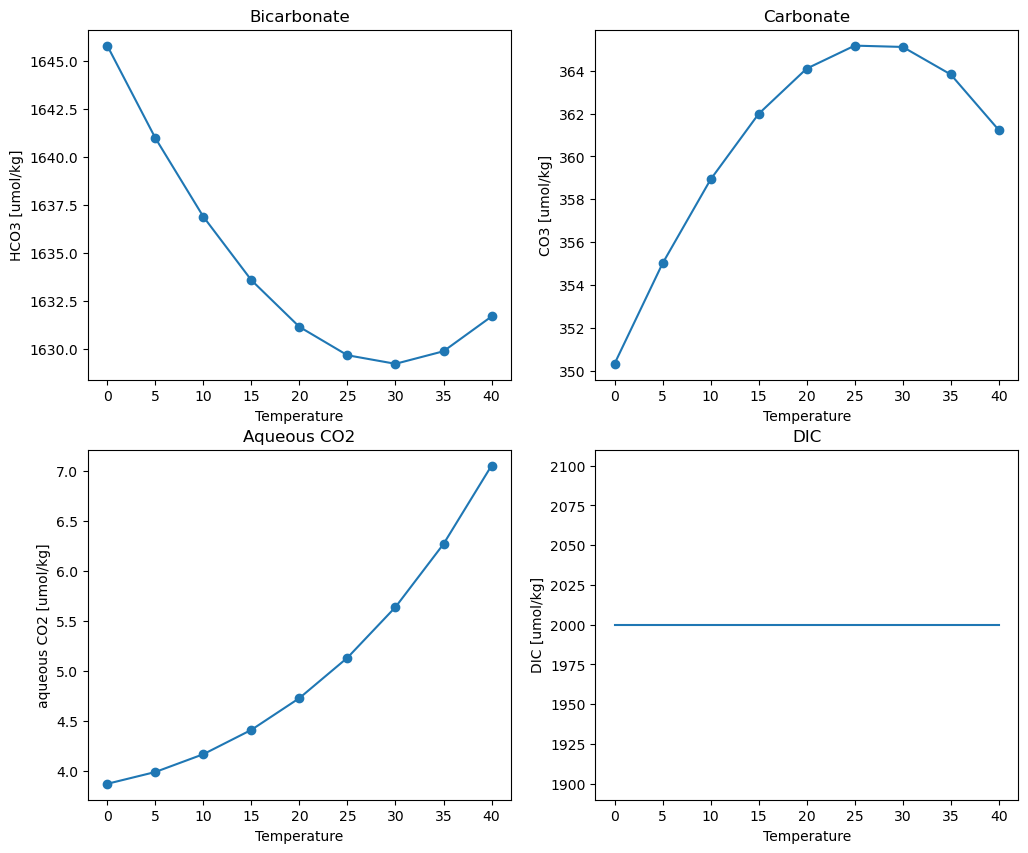

In [4]:
fig, axarr = plt.subplots(nrows = 2, ncols = 2, figsize = [12,10])
axarr = axarr.flatten()

ax = axarr[0]
ax.plot(T, HCO3, marker = 'o')
ax.set_xlabel('Temperature')
ax.set_ylabel('HCO3 [umol/kg]')
ax.set_title('Bicarbonate')
ax = axarr[1]
ax.plot(T, CO3, marker = 'o')
ax.set_xlabel('Temperature')
ax.set_ylabel('CO3 [umol/kg]')
ax.set_title('Carbonate')
ax = axarr[2]
ax.plot(T, CO2, marker = 'o')
ax.set_xlabel('Temperature')
ax.set_ylabel('aqueous CO2 [umol/kg]')
ax.set_title('Aqueous CO2')
ax = axarr[3]
ax.plot(T, HCO3 + CO3 + CO2)
# ax.plot(T, Hfree*1000, marker = 'o')
ax.set_xlabel('Temperature')
ax.set_ylabel('DIC [umol/kg]')
ax.set_title('DIC')

Text(0.5, 1.0, 'K1/k2')

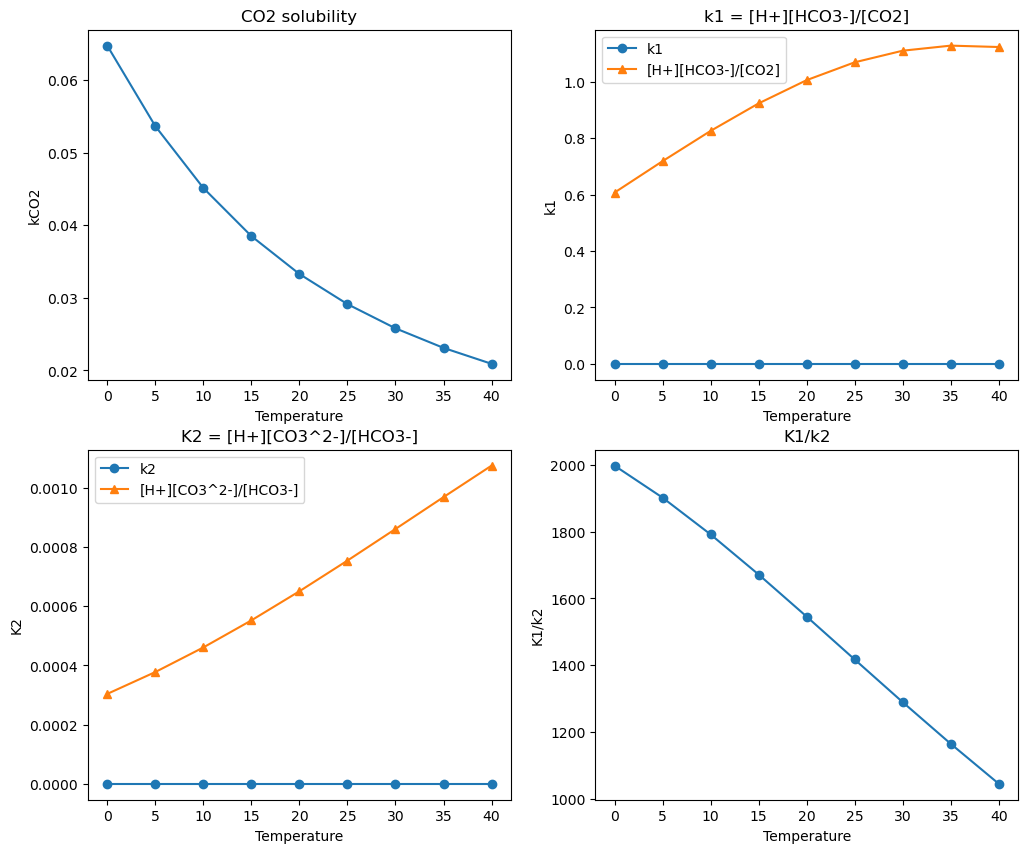

In [6]:
fig, axarr = plt.subplots(nrows = 2, ncols = 2, figsize = [12,10])
axarr = axarr.flatten()

ax = axarr[0]
ax.plot(T, kCO2, marker = 'o')
ax.set_xlabel('Temperature')
ax.set_ylabel('kCO2')
ax.set_title('CO2 solubility')
ax = axarr[1]
ax.plot(T, k1, marker = 'o', label = 'k1')
ax.plot(T, (Hfree*bicarb)/co2aq, marker = '^', label = '[H+][HCO3-]/[CO2]')
ax.set_xlabel('Temperature')
ax.set_ylabel('k1')
ax.set_title('k1 = [H+][HCO3-]/[CO2]')
ax.legend()
ax = axarr[2]
ax.plot(T, k2, marker = 'o', label = 'k2')
ax.plot(T, (Hfree*carb)/bicarb, marker = '^', label = '[H+][CO3^2-]/[HCO3-]')
ax.set_xlabel('Temperature')
ax.set_ylabel('K2')
ax.set_title('K2 = [H+][CO3^2-]/[HCO3-]')
ax.legend()
ax = axarr[3]
ax.plot(T, k1/k2, marker = 'o')
ax.set_xlabel('Temperature')
ax.set_ylabel('K1/k2')
ax.set_title('K1/k2')

Text(0.5, 1.0, '$H_2CO_3^* \\rightleftharpoons H^+ + HCO_3^-$')

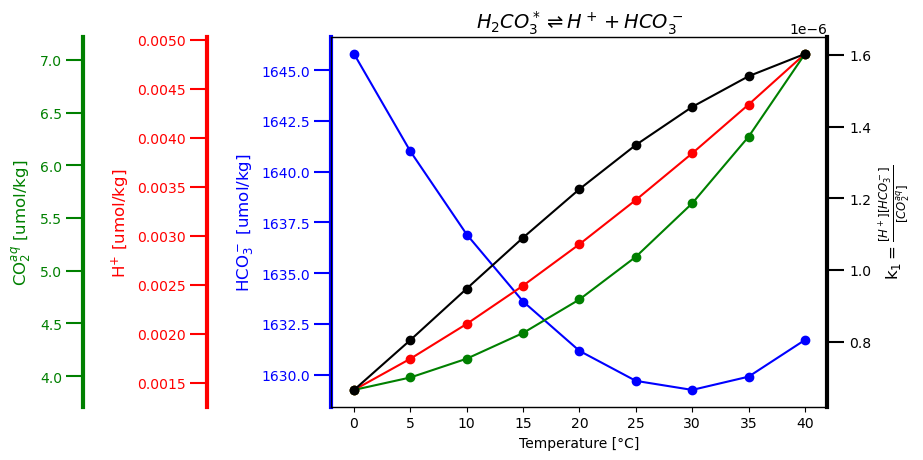

In [7]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax4 = ax1.twinx()

# Bicarbonate
ax1.plot(T, HCO3, marker = 'o', c = 'blue')
ax1.set_xlabel('Temperature [°C]')
p1 = ax1.set_ylabel('HCO$_3^-$ [umol/kg]', color = 'blue', fontsize = 12)

# H+
ax2.plot(T, Hfree, marker = 'o', c = 'red')
p2 = ax2.set_ylabel('H$^{+}$ [umol/kg]', color = 'red', fontsize = 12)

# CO2 aqueous
ax3.plot(T, CO2, marker = 'o', c = 'green')
p3 = ax3.set_ylabel('CO$_2^{aq}$ [umol/kg]', color = 'green', fontsize = 12)

# H+
ax4.plot(T, k1, marker = 'o', c = 'k')
p4 = ax4.set_ylabel(r'k$_1 = \frac{[H^+][HCO_3^-]}{[CO_2^{aq}]}$', color = 'k', fontsize = 12)

ax2.spines["left"].set_position(("axes", -0.25))
ax3.spines["left"].set_position(("axes", -0.5))
ax4.spines["right"].set_position(("axes", 1))

tkw = dict(labelsize = 10, size=12, width=1.5)
ax1.tick_params(axis='y', colors='blue', **tkw)
ax2.tick_params(axis='y', colors='red', **tkw)
ax3.tick_params(axis='y', colors='green', **tkw)
ax4.tick_params(axis='y', colors='k', **tkw)

ax1.spines['left'].set_color('blue')
ax1.spines['left'].set_linewidth(3)
ax2.spines["left"].set_color('red')
ax2.spines["left"].set_linewidth(3)
ax3.spines['left'].set_color('green')
ax3.spines['left'].set_linewidth(3)
ax4.spines['right'].set_color('k')
ax4.spines['right'].set_linewidth(3)

ax2.yaxis.set_ticks_position("left")
ax2.yaxis.set_label_position("left")
ax3.yaxis.set_ticks_position("left")
ax3.yaxis.set_label_position("left")
# ax4.yaxis.set_ticks_position("left")
# ax4.yaxis.set_label_position("left")

# txt1 = r'$CO_2 + H_2O \rightleftharpoons H_2CO_3^*$'
# txt2 = r'$H_2CO_3^* \rightleftharpoons H^+ + HCO_3^-$'
# txt3 = r'$HCO_3^- \rightleftharpoons H^+ + CO_3^{2-}$'
# txt = txt1 + '\n' + txt2 + '\n' + txt3
# plt.annotate(txt,
#              xy=(1.25,0.5), xycoords = 'axes fraction',
#              # xytext=(1.25, 0.1), horizontalalignment="center",
#              arrowprops=dict(arrowstyle='<- , head_width = 0.5',lw=4, color = 'blue'), fontsize = 10,
#             bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round,pad=0.3'))

ax1.set_title(r'$H_2CO_3^* \rightleftharpoons H^+ + HCO_3^-$', fontsize = 14)

Text(0.5, 1.0, '$HCO_3^- \\rightleftharpoons H^+ + CO_3^{2-}$')

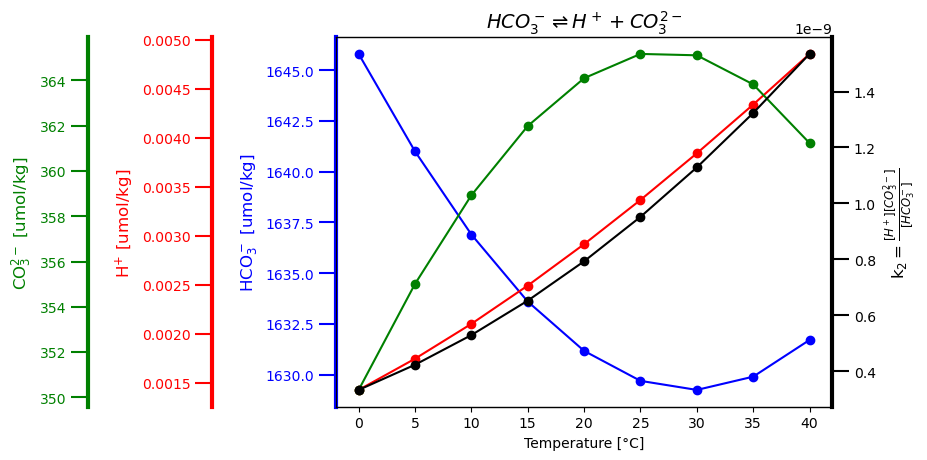

In [8]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax4 = ax1.twinx()

# Bicarbonate
ax1.plot(T, HCO3, marker = 'o', c = 'blue')
ax1.set_xlabel('Temperature [°C]')
p1 = ax1.set_ylabel('HCO$_3^-$ [umol/kg]', color = 'blue', fontsize = 12)

# H+
ax2.plot(T, Hfree, marker = 'o', c = 'red')
p2 = ax2.set_ylabel('H$^{+}$ [umol/kg]', color = 'red', fontsize = 12)

# CO3
ax3.plot(T, CO3, marker = 'o', c = 'green')
p3 = ax3.set_ylabel('CO$_3^{2-}$ [umol/kg]', color = 'green', fontsize = 12)

# k2
ax4.plot(T, k2, marker = 'o', c = 'k')
p4 = ax4.set_ylabel(r'k$_2 = \frac{[H^+][CO_3^{2-}]}{[HCO_3^-]}$', color = 'k', fontsize = 12)

ax2.spines["left"].set_position(("axes", -0.25))
ax3.spines["left"].set_position(("axes", -0.5))
ax4.spines["right"].set_position(("axes", 1))

tkw = dict(labelsize = 10, size=12, width=1.5)
ax1.tick_params(axis='y', colors='blue', **tkw)
ax2.tick_params(axis='y', colors='red', **tkw)
ax3.tick_params(axis='y', colors='green', **tkw)
ax4.tick_params(axis='y', colors='k', **tkw)

ax1.spines['left'].set_color('blue')
ax1.spines['left'].set_linewidth(3)
ax2.spines["left"].set_color('red')
ax2.spines["left"].set_linewidth(3)
ax3.spines['left'].set_color('green')
ax3.spines['left'].set_linewidth(3)
ax4.spines['right'].set_color('k')
ax4.spines['right'].set_linewidth(3)

ax2.yaxis.set_ticks_position("left")
ax2.yaxis.set_label_position("left")
ax3.yaxis.set_ticks_position("left")
ax3.yaxis.set_label_position("left")
# ax4.yaxis.set_ticks_position("left")
# ax4.yaxis.set_label_position("left")

ax1.set_title(r'$HCO_3^- \rightleftharpoons H^+ + CO_3^{2-}$', fontsize = 14)

Text(0.5, 1.0, '$CO_2 + H_2O \\rightleftharpoons H_2CO_3^*$')

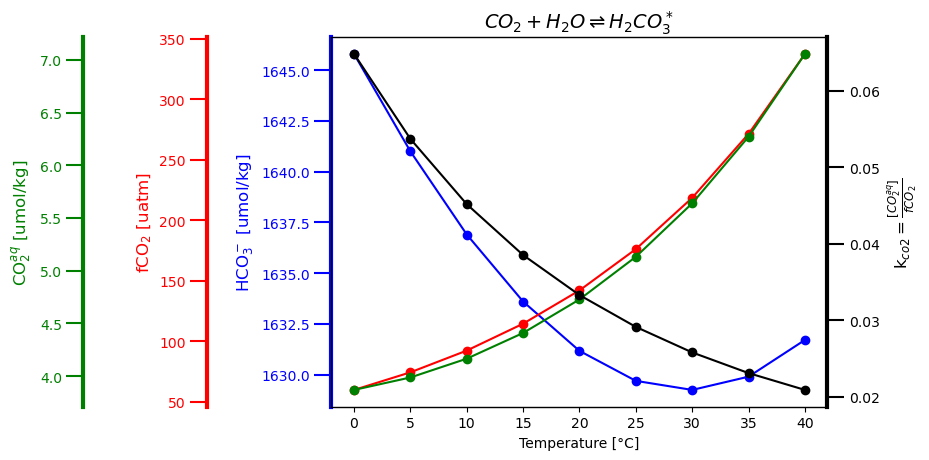

In [9]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax4 = ax1.twinx()

# Bicarbonate
ax1.plot(T, HCO3, marker = 'o', c = 'blue')
ax1.set_xlabel('Temperature [°C]')
p1 = ax1.set_ylabel('HCO$_3^-$ [umol/kg]', color = 'blue', fontsize = 12)

# fCO2
ax2.plot(T, results['fCO2'], marker = 'o', c = 'red')
p2 = ax2.set_ylabel('fCO$_2$ [uatm]', color = 'red', fontsize = 12)

# CO2
ax3.plot(T, CO2, marker = 'o', c = 'green')
p3 = ax3.set_ylabel('CO$_2^{aq}$ [umol/kg]', color = 'green', fontsize = 12)

# kCO2
ax4.plot(T, kCO2, marker = 'o', c = 'k')
p4 = ax4.set_ylabel(r'k$_{co2} = \frac{[CO_2^{aq}]}{fCO_2}$', color = 'k', fontsize = 12)

ax2.spines["left"].set_position(("axes", -0.25))
ax3.spines["left"].set_position(("axes", -0.5))
ax4.spines["right"].set_position(("axes", 1))

tkw = dict(labelsize = 10, size=12, width=1.5)
ax1.tick_params(axis='y', colors='blue', **tkw)
ax2.tick_params(axis='y', colors='red', **tkw)
ax3.tick_params(axis='y', colors='green', **tkw)
ax4.tick_params(axis='y', colors='k', **tkw)

ax1.spines['left'].set_color('blue')
ax1.spines['left'].set_linewidth(3)
ax2.spines["left"].set_color('red')
ax2.spines["left"].set_linewidth(3)
ax3.spines['left'].set_color('green')
ax3.spines['left'].set_linewidth(3)
ax4.spines['right'].set_color('k')
ax4.spines['right'].set_linewidth(3)

ax2.yaxis.set_ticks_position("left")
ax2.yaxis.set_label_position("left")
ax3.yaxis.set_ticks_position("left")
ax3.yaxis.set_label_position("left")
# ax4.yaxis.set_ticks_position("left")
# ax4.yaxis.set_label_position("left")

ax1.set_title(r'$CO_2 + H_2O \rightleftharpoons H_2CO_3^*$', fontsize = 14)

Text(1.25, 0.1, '$\\frac{\\partial X}{\\partial T} < 0$\nincreased T --> decreased X')

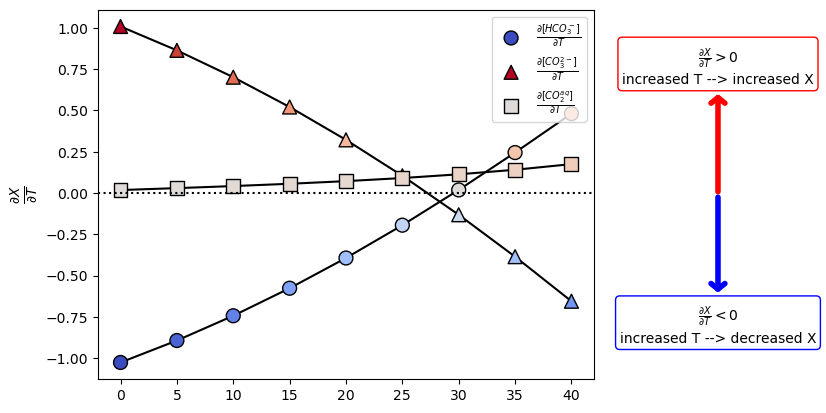

In [10]:
fig, ax1 = plt.subplots()
# ax2 = ax1.twinx()

ax1.plot(T, results['d_HCO3__d_temperature'], color = 'k', zorder = 1)
ax1.plot(T, results['d_CO3__d_temperature'], color = 'k', zorder = 1)
ax1.plot(T, results['d_CO2__d_temperature'], color = 'k', zorder = 1)

ax1.scatter(T, results['d_HCO3__d_temperature'], marker = 'o', s = 100, lw = 1, edgecolor = 'k',
            c = results['d_HCO3__d_temperature'], cmap = 'coolwarm', vmin = -1, vmax = 1,
            label = r'$\frac{\partial [HCO_3^-]}{\partial T}$')
ax1.scatter(T, results['d_CO3__d_temperature'], marker = '^', s = 100, lw = 1, edgecolor = 'k',
            c = results['d_CO3__d_temperature'], cmap = 'coolwarm', vmin = -1, vmax = 1,
            label = r'$\frac{\partial [CO_3^{2-}]}{\partial T}$')
ax1.scatter(T, results['d_CO2__d_temperature'], marker = 's', s = 100, lw = 1, edgecolor = 'k',
            c = results['d_CO2__d_temperature'], cmap = 'coolwarm', vmin = -1, vmax = 1,
            label = r'$\frac{\partial [CO_2^{aq}]}{\partial T}$')



ax1.axhline(0, ls = 'dotted', c = 'k')
ax1.legend(loc = 'upper right')
ax1.set_ylabel(r'$\frac{\partial X}{\partial T}$', fontsize = 14)

txt = r'$\frac{\partial X}{\partial T} > 0$' + '\n' + 'increased T --> increased X'
plt.annotate(txt,
             xy=(1.25,0.5), xycoords = 'axes fraction',
             xytext=(1.25, 0.8), horizontalalignment="center",
             arrowprops=dict(arrowstyle='<- , head_width = 0.5',lw=4, color = 'red'), fontsize = 10,
            bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.3'))

txt = r'$\frac{\partial X}{\partial T} < 0$' + '\n' + 'increased T --> decreased X'
plt.annotate(txt,
             xy=(1.25,0.5), xycoords = 'axes fraction',
             xytext=(1.25, 0.1), horizontalalignment="center",
             arrowprops=dict(arrowstyle='<- , head_width = 0.5',lw=4, color = 'blue'), fontsize = 10,
            bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round,pad=0.3'))


Text(0.5, 1.0, '$CO_2 + H_2O + CO_3^{2-} \\rightleftharpoons 2H_2CO_3^*$')

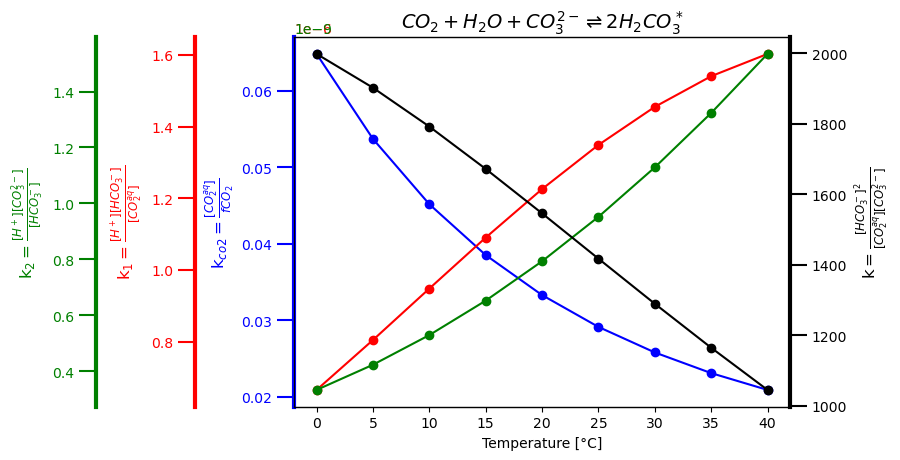

In [11]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax4 = ax1.twinx()

# k0
ax1.plot(T, kCO2, marker = 'o', c = 'blue')
ax1.set_xlabel('Temperature [°C]')
p1 = ax1.set_ylabel(r'k$_{co2} = \frac{[CO_2^{aq}]}{fCO_2}$', color = 'blue', fontsize = 12)

# k1
ax2.plot(T, k1, marker = 'o', c = 'red')
p2 = ax2.set_ylabel(r'k$_1 = \frac{[H^+][HCO_3^-]}{[CO_2^{aq}]}$', color = 'red', fontsize = 12)

# CO2
ax3.plot(T, k2, marker = 'o', c = 'green')
p3 = ax3.set_ylabel(r'k$_2 = \frac{[H^+][CO_3^{2-}]}{[HCO_3^-]}$', color = 'green', fontsize = 12)

# k1/k2
ax4.plot(T, k1/k2, marker = 'o', c = 'k')
p4 = ax4.set_ylabel(r'k$ = \frac{[HCO_3^-]^2}{[CO_2^{aq}][CO_3^{2-}]}$', color = 'k', fontsize = 12)

ax2.spines["left"].set_position(("axes", -0.2))
ax3.spines["left"].set_position(("axes", -0.4))
ax4.spines["right"].set_position(("axes", 1))

tkw = dict(labelsize = 10, size=12, width=1.5)
ax1.tick_params(axis='y', colors='blue', **tkw)
ax2.tick_params(axis='y', colors='red', **tkw)
ax3.tick_params(axis='y', colors='green', **tkw)
ax4.tick_params(axis='y', colors='k', **tkw)

ax1.spines['left'].set_color('blue')
ax1.spines['left'].set_linewidth(3)
ax2.spines["left"].set_color('red')
ax2.spines["left"].set_linewidth(3)
ax3.spines['left'].set_color('green')
ax3.spines['left'].set_linewidth(3)
ax4.spines['right'].set_color('k')
ax4.spines['right'].set_linewidth(3)

ax2.yaxis.set_ticks_position("left")
ax2.yaxis.set_label_position("left")
ax3.yaxis.set_ticks_position("left")
ax3.yaxis.set_label_position("left")
# ax4.yaxis.set_ticks_position("left")
# ax4.yaxis.set_label_position("left")

ax1.set_title(r'$CO_2 + H_2O + CO_3^{2-} \rightleftharpoons 2H_2CO_3^*$', fontsize = 14)

In [12]:
k1

array([6.65716823e-07, 8.04934494e-07, 9.48332466e-07, 1.09048964e-06,
       1.22580167e-06, 1.34891161e-06, 1.45509919e-06, 1.54058964e-06,
       1.60275760e-06])

In [70]:
T = np.linspace(0,30,11)

In [21]:
import calc_coeffs as co2

In [71]:
[t,s] = np.meshgrid(T,30)
cffs = co2.calc_coeffs(t,s)

In [72]:
results = pyco2.sys(par1 = 2500, par2 = 2000, par1_type = 1, par2_type = 2, temperature = 0, salinity = 30)
HCO3 = results['HCO3']
bicarb = results['bicarbonate']
CO3 = results['CO3']
carb = results['carbonate']
CO2 = results['CO2']
co2aq = results['aqueous_CO2']
Hfree = results['Hfree']
co2aq

3.8697518194644176

Text(1.25, 0.45, 'Initial State @ 0°C\n$[HCO_3^-] = 1645.8\\ \\mu$mol/kg\n$[CO_3^{2-}] = 350.3\\ \\mu$mol/kg\n$[CO_2^{aq}] = 3.9\\ \\mu$mol/kg')

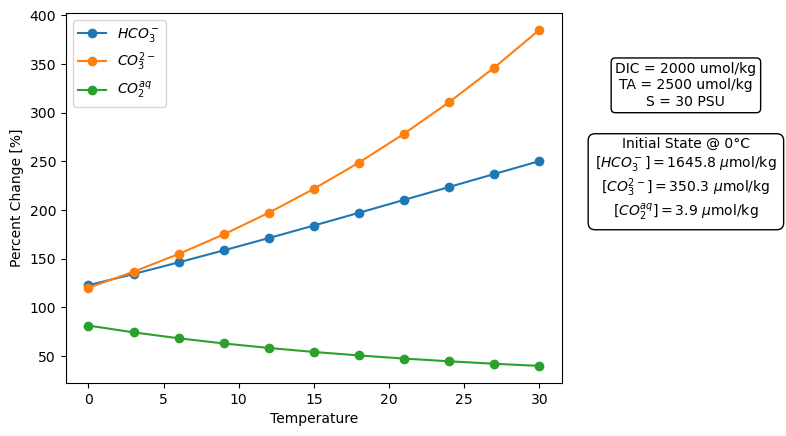

In [87]:
# k1 = [H][HCO3]/[CO2*]
# k2 = [H][CO3]/[HCO3]
hco3 = (cffs['k1'].reshape(-1,1) * 1e6) * co2aq/Hfree
co3 = (cffs['k2'].reshape(-1,1) * 1e6) * HCO3/Hfree
co2star = (Hfree * HCO3)/(cffs['k1'].reshape(-1,1) * 1e6)
plt.plot(T, 100*hco3/HCO3, marker = 'o', label = '$HCO_3^-$')
plt.plot(T, 100*co3/CO3, marker = 'o', label = '$CO_3^{2-}$')
plt.plot(T, 100*co2star/CO2, marker = 'o', label = '$CO_2^{aq}$')
plt.ylabel('Percent Change [%]')
plt.xlabel('Temperature')
plt.legend()

txt = 'DIC = 2000 umol/kg\nTA = 2500 umol/kg\nS = 30 PSU'
txt2 = r'$[HCO_3^-] = 1645.8\ \mu$mol/kg'
txt3 = r'$[CO_3^{2-}] = 350.3\ \mu$mol/kg'
txt4 = r'$[CO_2^{aq}] = 3.9\ \mu$mol/kg'
plt.annotate(txt,
             xy=(1.25,0.75), xycoords = 'axes fraction',
            horizontalalignment="center", fontsize = 10,
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

txt1 = 'Initial State @ 0°C'
txt2 = r'$[HCO_3^-] = 1645.8\ \mu$mol/kg'
txt3 = r'$[CO_3^{2-}] = 350.3\ \mu$mol/kg'
txt4 = r'$[CO_2^{aq}] = 3.9\ \mu$mol/kg'
plt.annotate(txt1 + '\n' + txt2 + '\n' + txt3 + '\n' + txt4,
             xy=(1.25,0.45), xycoords = 'axes fraction',
            horizontalalignment="center", fontsize = 10,
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

Text(1.25, 0.45, 'Initial State @ 0°C\n$[HCO_3^-] = 1645.8\\ \\mu$mol/kg\n$[CO_3^{2-}] = 350.3\\ \\mu$mol/kg\n$[CO_2^{aq}] = 3.9\\ \\mu$mol/kg')

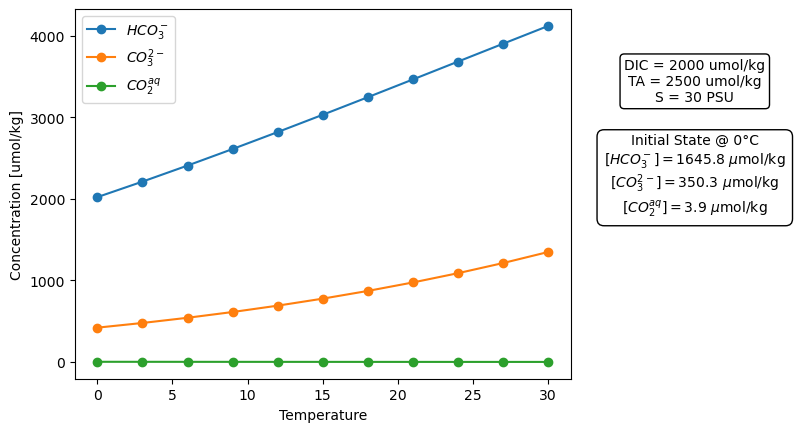

In [89]:
# k1 = [H][HCO3]/[CO2*]
# k2 = [H][CO3]/[HCO3]
hco3 = (cffs['k1'].reshape(-1,1) * 1e6) * co2aq/Hfree
co3 = (cffs['k2'].reshape(-1,1) * 1e6) * HCO3/Hfree
co2star = (Hfree * HCO3)/(cffs['k1'].reshape(-1,1) * 1e6)
plt.plot(T, hco3, marker = 'o', label = '$HCO_3^-$')
plt.plot(T, co3, marker = 'o', label = '$CO_3^{2-}$')
plt.plot(T, co2star, marker = 'o', label = '$CO_2^{aq}$')
plt.ylabel('Concentration [umol/kg]')
plt.xlabel('Temperature')
plt.legend()

txt = 'DIC = 2000 umol/kg\nTA = 2500 umol/kg\nS = 30 PSU'
txt2 = r'$[HCO_3^-] = 1645.8\ \mu$mol/kg'
txt3 = r'$[CO_3^{2-}] = 350.3\ \mu$mol/kg'
txt4 = r'$[CO_2^{aq}] = 3.9\ \mu$mol/kg'
plt.annotate(txt,
             xy=(1.25,0.75), xycoords = 'axes fraction',
            horizontalalignment="center", fontsize = 10,
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

txt1 = 'Initial State @ 0°C'
txt2 = r'$[HCO_3^-] = 1645.8\ \mu$mol/kg'
txt3 = r'$[CO_3^{2-}] = 350.3\ \mu$mol/kg'
txt4 = r'$[CO_2^{aq}] = 3.9\ \mu$mol/kg'
plt.annotate(txt1 + '\n' + txt2 + '\n' + txt3 + '\n' + txt4,
             xy=(1.25,0.45), xycoords = 'axes fraction',
            horizontalalignment="center", fontsize = 10,
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))